### Imports

In [1]:
from skin_data import (
    SkinData, 
    simulate_skin_data, 
    print_skin_data, 
    find_highest_pressure,
    apply_Knn,
    reorder_clusters,
    apply_KMC, 
    get_cluster_metrics
)
from tactile_objects import (
    TactileObjects,
    TactileObjectsTask
)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import neighbors, cluster, decomposition
import sklearn.metrics as sm
from itertools import permutations
import numpy as np
import math
import time
%matplotlib inline
%matplotlib nbagg

### load data

In [2]:
skin = SkinData("./../data/palpation_experiment_test.mat")
all_skin_data = skin.get_data() # dictionary

ValueError: cannot reshape array of size 1944 into shape (8,3)

In [3]:
skin = SkinData("./../data/palpation_experiment_test.mat")
all_skin_data = skin.get_data() # dictionary

tact_objects = TactileObjects(['cilinder', 'eraser', 'marker'])

# classes data
cilinder_skin_data = all_skin_data['cilindro'] # dim (6x10xN)
gomma_skin_data = all_skin_data['gomma']
pennarello_skin_data = all_skin_data['pennarello']

# temporal concatenated data
temporal_skin_data = np.concatenate((cilinder_skin_data, gomma_skin_data, pennarello_skin_data), axis=2)
temporal_skin_data = temporal_skin_data.T.reshape(temporal_skin_data.shape[2], -1) # dim (Nx60)
temporal_skin_targets = np.concatenate(
                        (np.repeat(np.array([0]), cilinder_skin_data.shape[2], axis=0),  # class cilindro   => 0
                         np.repeat(np.array([1]), gomma_skin_data.shape[2], axis=0),     # class gomma      => 1
                         np.repeat(np.array([2]), pennarello_skin_data.shape[2], axis=0),# class pennarello => 2
                        ))

# good time snapshots for each class
cilinder_snapshot = cilinder_skin_data[:,:,find_highest_pressure(cilinder_skin_data)].reshape(1,-1)
gomma_snapshot = gomma_skin_data[:,:,find_highest_pressure(gomma_skin_data)].reshape(1,-1)
pennarello_snapshot = pennarello_skin_data[:,:,find_highest_pressure(pennarello_skin_data)].reshape(1,-1)
snapshot_skin_data = np.zeros((3, 60))
snapshot_skin_data[0,:] = cilinder_snapshot
snapshot_skin_data[1,:] = gomma_snapshot
snapshot_skin_data[2,:] = pennarello_snapshot
snapshot_skin_targets = np.array([0, 1, 2])

### Skin Data Animation

In [ ]:
simulate_skin_data(cilinder_skin_data, interpolation=True)

In [ ]:
simulate_skin_data(gomma_skin_data)

In [ ]:
simulate_skin_data(pennarello_skin_data)

##### PCA

In [ ]:
pca = decomposition.PCA(n_components=3) # pca object

#pca on three well picked snapshots for each class
pca.fit(snapshot_skin_data)
projected_snapshot_skin_data = pca.transform(snapshot_skin_data)

#pca on all temporal data (classes concatenated)
pca = decomposition.PCA(n_components=3)
projected_temporal_skin_data = pca.fit_transform(temporal_skin_data)

In [ ]:
# pca on three snapshots plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(snapshot_skin_data[:, 0],
           snapshot_skin_data[:, 1], 
           snapshot_skin_data[:, 2])

In [ ]:
# pca on all temporal data plt 3-dimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected_temporal_skin_data[:, 0],
           projected_temporal_skin_data[:, 1], 
           projected_temporal_skin_data[:, 2])

In [ ]:
# pca on all tempolar data plt 2-dimensional
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(111)
ax.scatter(projected_temporal_skin_data[:, 0],
           projected_temporal_skin_data[:, 1])

### KNearestNeighbors

In [ ]:
apply_Knn(projected_snapshot_skin_data, snapshot_skin_targets, n_neighbors=1, mesh=True)

In [ ]:
apply_Knn(projected_temporal_skin_data, temporal_skin_targets, mesh=True)

### Kmeans Clustering

In [ ]:
snaphot_data_clusters = apply_KMC(projected_snapshot_skin_data, snapshot_skin_targets, tact_objects)

In [ ]:
temporal_data_clusters = apply_KMC(projected_temporal_skin_data, temporal_skin_targets, tact_objects)

#### Confusion Matrices

In [ ]:
met1 = get_cluster_metrics(snaphot_data_clusters, snapshot_skin_targets, tact_objects)

In [ ]:
met2 = get_cluster_metrics(temporal_data_clusters, temporal_skin_targets, tact_objects)

<IPython.core.display.Javascript object>


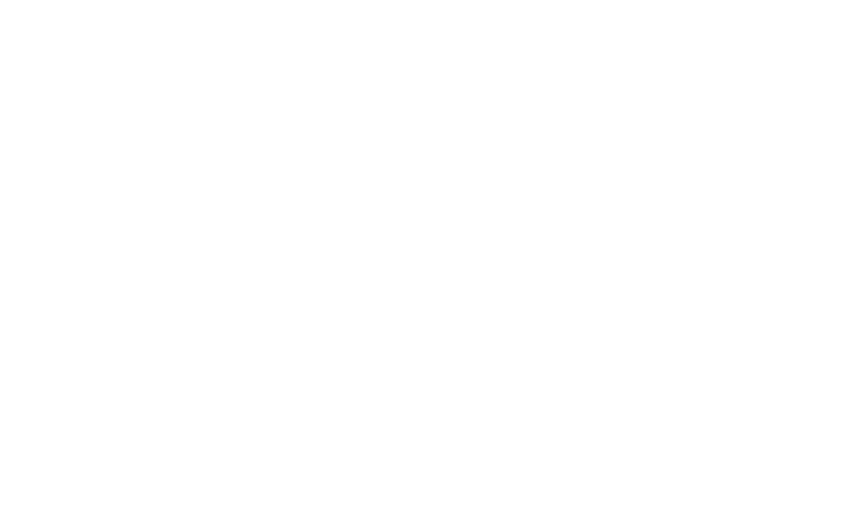

<IPython.core.display.Javascript object>


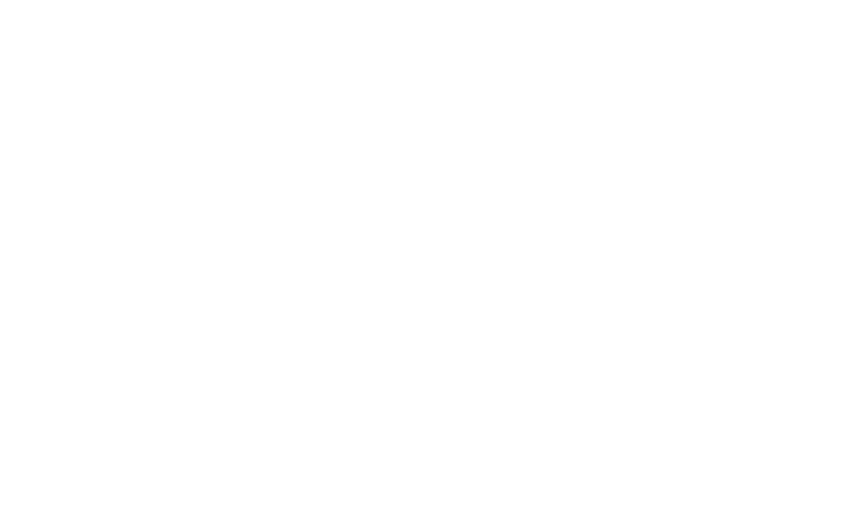

<IPython.core.display.Javascript object>


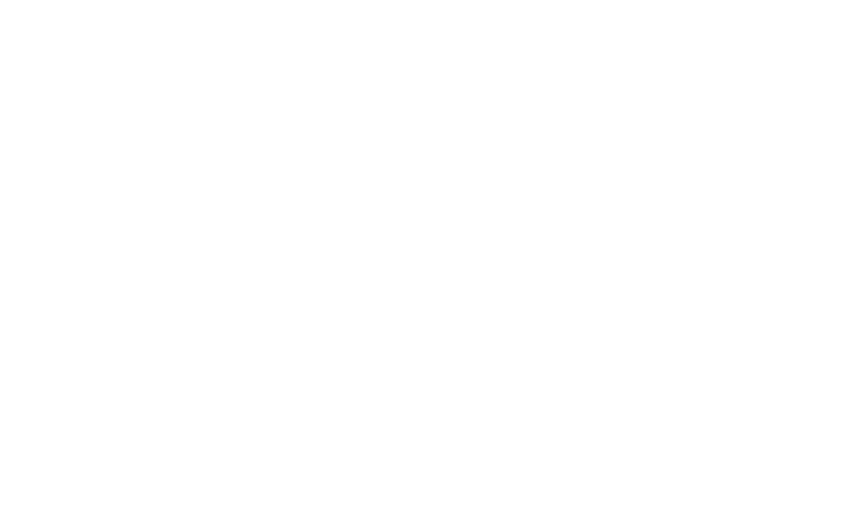

<IPython.core.display.Javascript object>


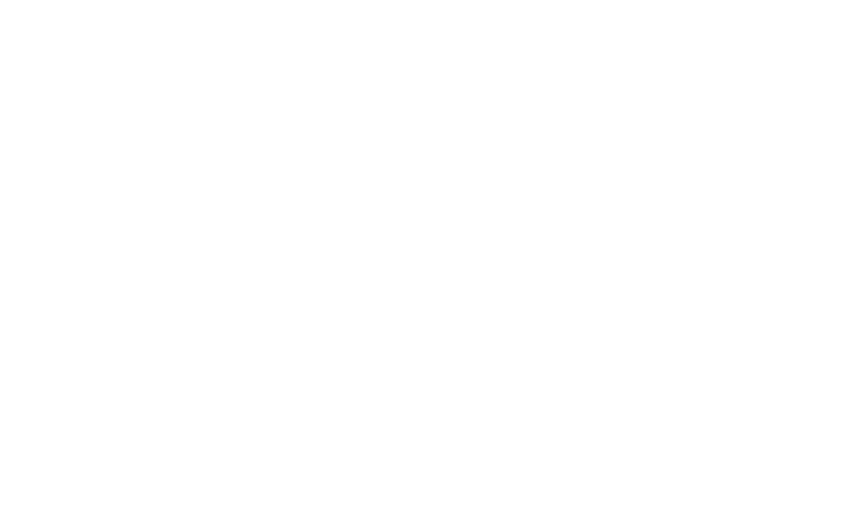

<IPython.core.display.Javascript object>


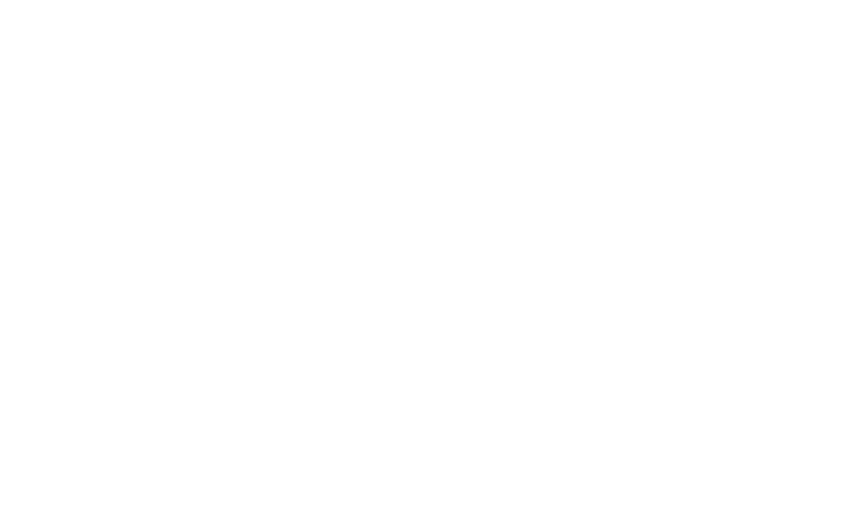

<IPython.core.display.Javascript object>


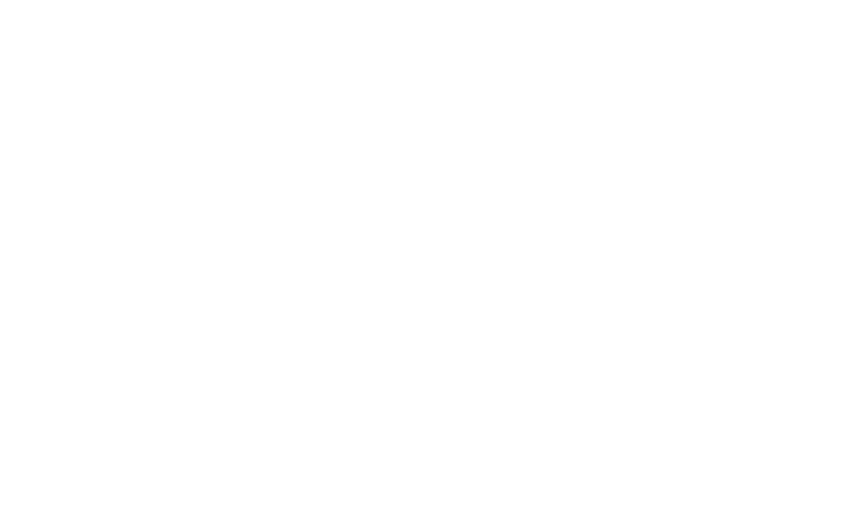

<IPython.core.display.Javascript object>


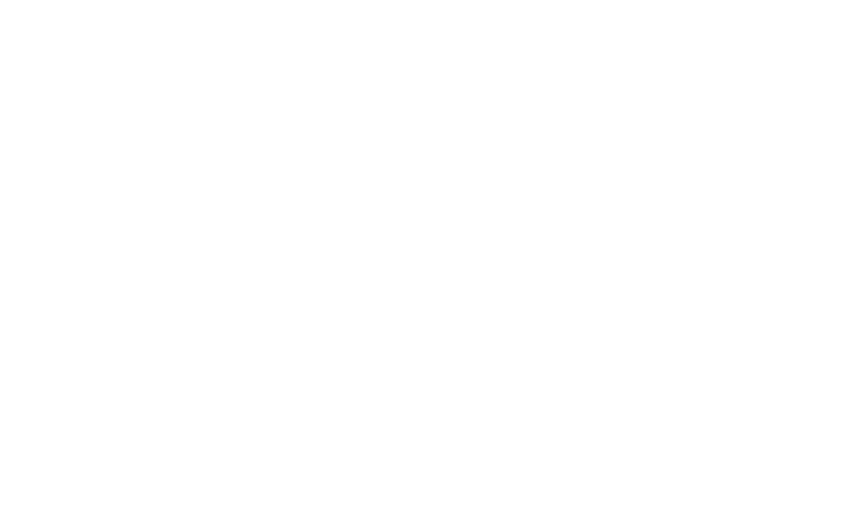

<IPython.core.display.Javascript object>


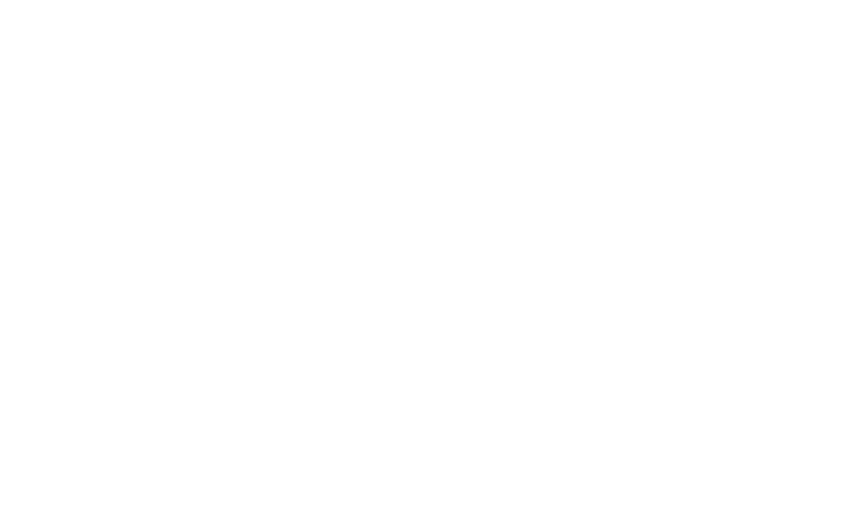

<IPython.core.display.Javascript object>


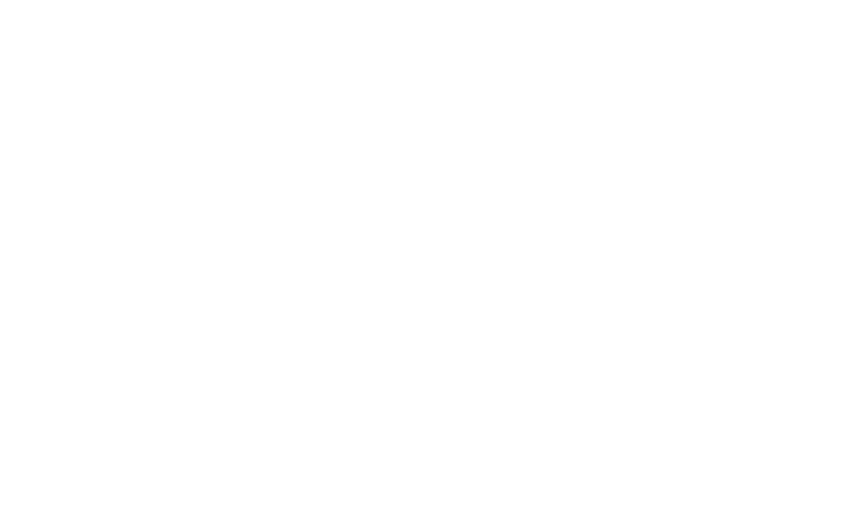

<IPython.core.display.Javascript object>


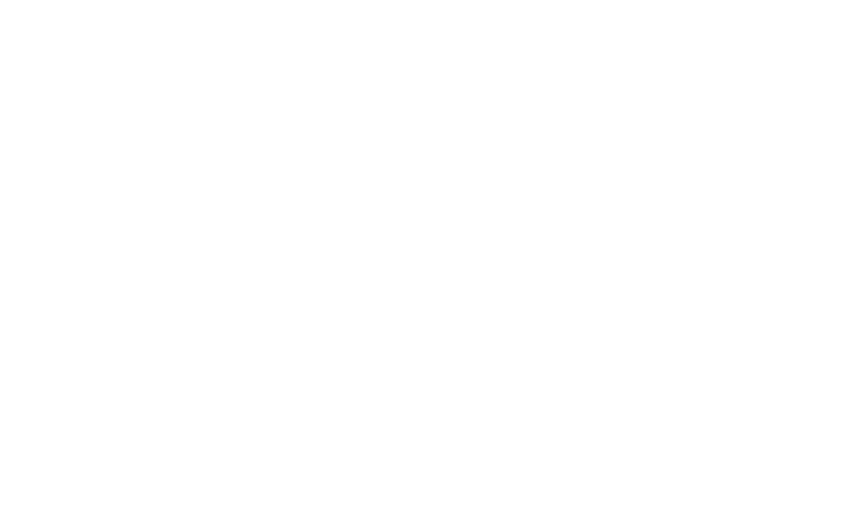

<IPython.core.display.Javascript object>


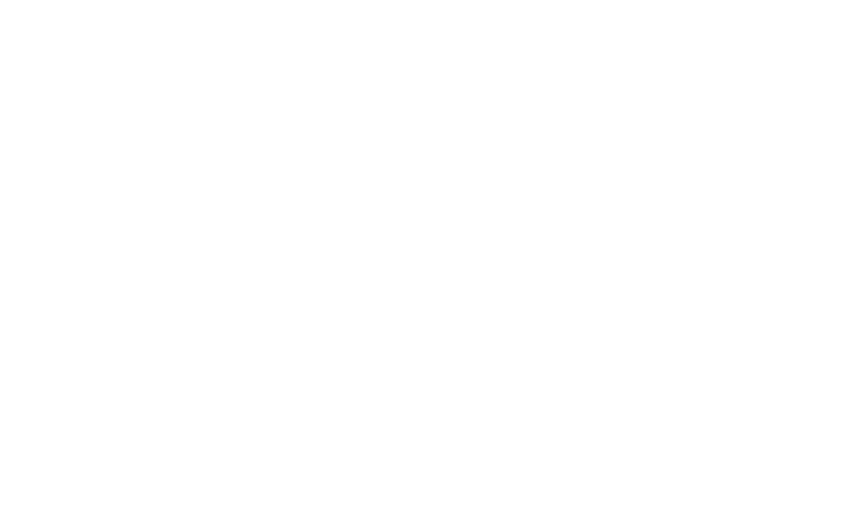

<IPython.core.display.Javascript object>


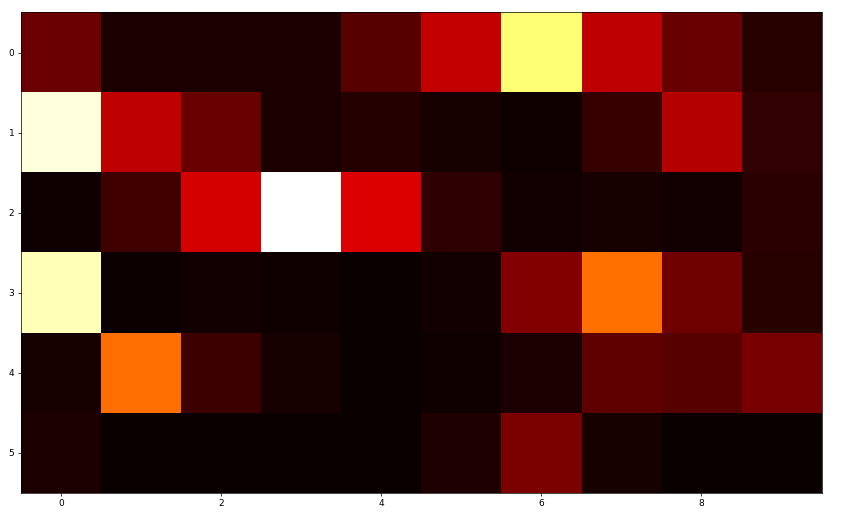

In [3]:
from skin_data import fill_canvas
from experiment_setup import ExperimentSetup

skin = SkinData("./../data/skin_experiments.mat")
all_skin_data = skin.get_data() # dictionary

def plt_snapshot(snapshot, min_snapshot):
    plt.close('all')
    fig = plt.figure(figsize=(13, 8))
    ax = fig.add_subplot(111)
    minimum = np.min(min_snapshot)
    skin_canvas = np.multiply(np.ones((10, 10)), minimum)
    skin_array = fill_canvas(skin_canvas, snapshot)
    ax.imshow(skin_array, cmap='hot', interpolation='bicubic')
    return fig

experiments = ['3mil', '6mil', '10mil']
for exp in experiments:
    exp_min = ExperimentSetup("./../data/skin_experiments.mat", best_pressure_time=5)
    exp_min_data = exp_min.get_experiment_data()
    min_snapshot_data = exp_min_data[exp]

    exp_setup = ExperimentSetup("./../data/skin_experiments.mat", best_pressure_time=140)
    exp_data = exp_setup.get_experiment_data()
    classes = exp_setup.get_classes()
    data = exp_data[exp]

    for i in range(4):
        fig = plt_snapshot(data[i,:].reshape((6,10)), min_snapshot_data[i,:].reshape((6,10)))
        fig.tight_layout()
#         fig.savefig('../manuscript/figs/'+ exp + '_' + classes[i] + '.pdf', bbox_inches='tight')



<IPython.core.display.Javascript object>


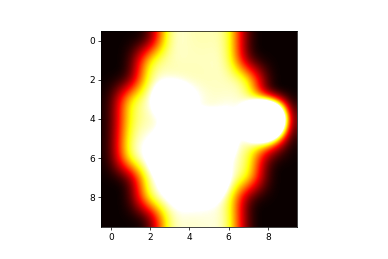

In [4]:
Sphere_skin_data = all_skin_data['Sphere_6mil_trial2']
simulate_skin_data(Sphere_skin_data, interpolation='bicubic')

<IPython.core.display.Javascript object>


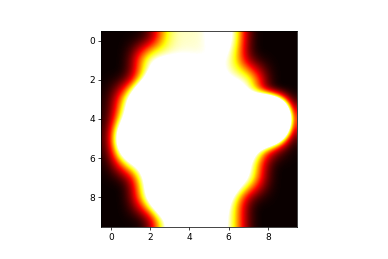

In [5]:
HSphere_skin_data = all_skin_data['HSphere_6mil_trial2']
simulate_skin_data(HSphere_skin_data, interpolation='bicubic')

<IPython.core.display.Javascript object>


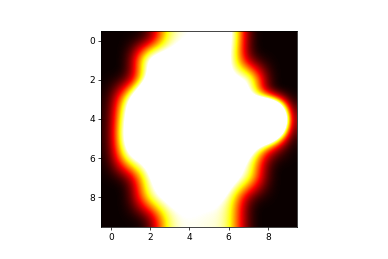

In [6]:
HCube_skin_data = all_skin_data['HCube_10mil_trial2']
simulate_skin_data(HCube_skin_data, interpolation='bicubic')

In [7]:
plt.imshow(HSphere_skin_data[:,:,120], cmap='hot', interpolation='nearest')
plt.show()

dict_keys(['dummyobject_nopad_trial1', 'fingertest_nopad_trial1'])


<IPython.core.display.Javascript object>


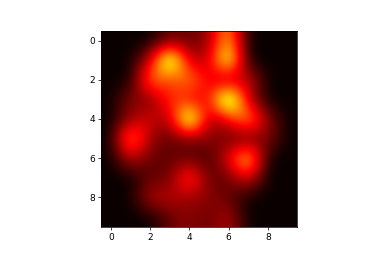

In [9]:
from skin_data import fill_canvas
from experiment_setup import ExperimentSetup

skin = SkinData("./../data/fingertest.mat")
all_skin_data = skin.get_data() # dictionary
print(all_skin_data.keys())
Sphere_skin_data = all_skin_data['fingertest_nopad_trial1']
simulate_skin_data(Sphere_skin_data, interpolation='bicubic')